# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [199]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df
#df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [102]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [103]:
# Check for missing values
missing_values = df.isnull().sum(axis=0)

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64


Look at some basic statistics for numerical variables.

In [104]:
# Count number of applicants with Credit_History = 1
num_with_credit_history = df['Credit_History'].value_counts()[1]# Print the result
print("Number of applicants with a Credit History: ", num_with_credit_history)

Number of applicants with a Credit History:  475


In [105]:
# Check the distribution of ApplicantIncome
print("ApplicantIncome distribution:")
print("Mean: ", df['ApplicantIncome'].mean())
print("Median: ", df['ApplicantIncome'].median())

# Check the distribution of CoapplicantIncome
print("\nCoapplicantIncome distribution:")
print("Mean: ", df['CoapplicantIncome'].mean())
print("Median: ", df['CoapplicantIncome'].median())


ApplicantIncome distribution:
Mean:  5403.459283387622
Median:  3812.5

CoapplicantIncome distribution:
Mean:  1621.245798027101
Median:  1188.5


In [106]:
#This code snippet will print the mean and median values for both ApplicantIncome and CoapplicantIncome. We can compare the mean and median values to determine if the distribution of each feature is symmetrical or skewed.

#If the mean and median values are close to each other, the distribution is likely to be symmetrical. If the mean is greater than the median, the distribution is likely to be positively skewed, and if the mean is less than the median, the distribution is likely to be negatively skewed.

#It is difficult to say whether the distributions are in line with our expectations without more information about the dataset and the underlying population. However, we can say whether the distributions are skewed or symmetrical by comparing the mean and median values.

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [107]:
# Print the number of unique values in each nominal variable
print("Number of unique values in nominal variables:")
print("Gender: ", df['Gender'].nunique())
print("Married: ", df['Married'].nunique())
print("Dependents: ", df['Dependents'].nunique())
print("Education: ", df['Education'].nunique())
print("Self_Employed: ", df['Self_Employed'].nunique())
print("Property_Area: ", df['Property_Area'].nunique())
print("Loan_Status: ", df['Loan_Status'].nunique())


Number of unique values in nominal variables:
Gender:  2
Married:  2
Dependents:  4
Education:  2
Self_Employed:  2
Property_Area:  3
Loan_Status:  2


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [108]:
# Print the frequency of each category in each nominal variable
print("Frequency of categories in nominal variables:")
print("Gender: \n", df['Gender'].value_counts())
print("Married: \n", df['Married'].value_counts())
print("Dependents: \n", df['Dependents'].value_counts())
print("Education: \n", df['Education'].value_counts())
print("Self_Employed: \n", df['Self_Employed'].value_counts())
print("Property_Area: \n", df['Property_Area'].value_counts())
print("Loan_Status: \n", df['Loan_Status'].value_counts())


Frequency of categories in nominal variables:
Gender: 
 Male      489
Female    112
Name: Gender, dtype: int64
Married: 
 Yes    398
No     213
Name: Married, dtype: int64
Dependents: 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education: 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed: 
 No     500
Yes     82
Name: Self_Employed, dtype: int64
Property_Area: 
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Loan_Status: 
 Y    422
N    192
Name: Loan_Status, dtype: int64


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



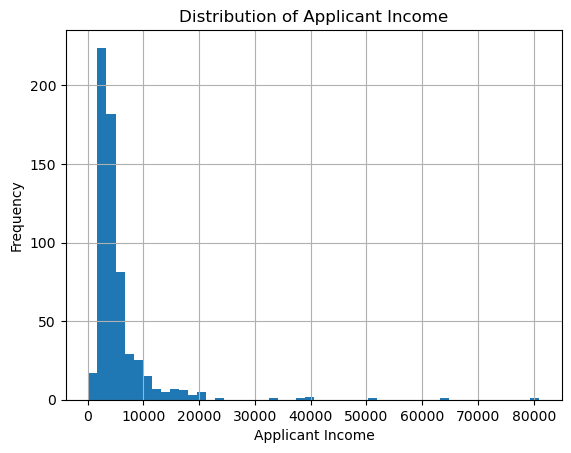

In [109]:
import matplotlib.pyplot as plt

# Plot histogram of ApplicantIncome
df['ApplicantIncome'].hist(bins=50)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income')
plt.show()


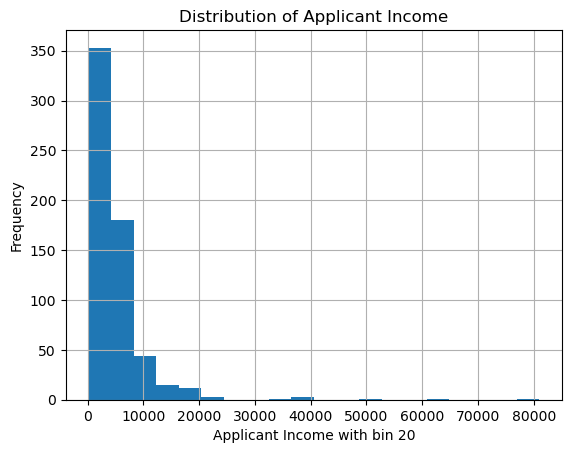

In [166]:
# Plot histogram of ApplicantIncome

df['ApplicantIncome'].hist(bins=20)
plt.xlabel('Applicant Income with bin 20')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income')
plt.show()

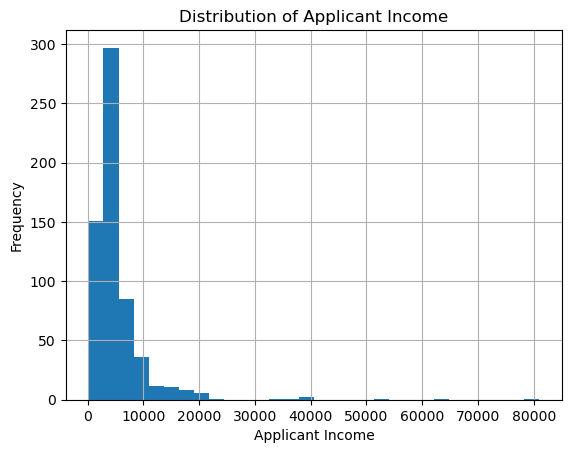

In [111]:
# Plot histogram of ApplicantIncome

df['ApplicantIncome'].hist(bins=30)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income')
plt.show()


Look at box plots to understand the distributions. 

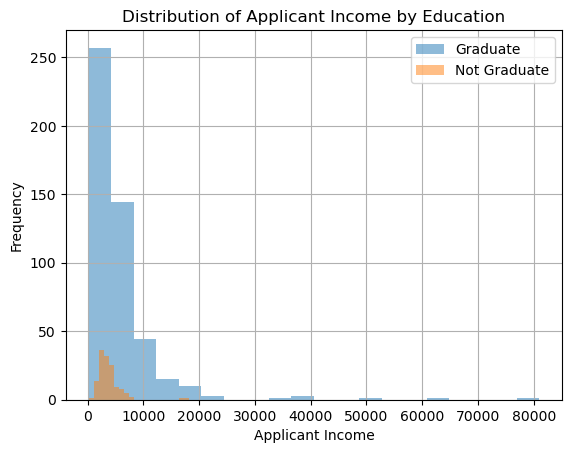

In [112]:

# Group data by Education and plot histogram of ApplicantIncome for each group
df.groupby('Education')['ApplicantIncome'].hist(alpha=0.5, bins=20)
plt.legend(df['Education'].unique())
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income by Education')
plt.show()


Look at the distribution of income segregated  by `Education`

Look at the histogram and boxplot of LoanAmount

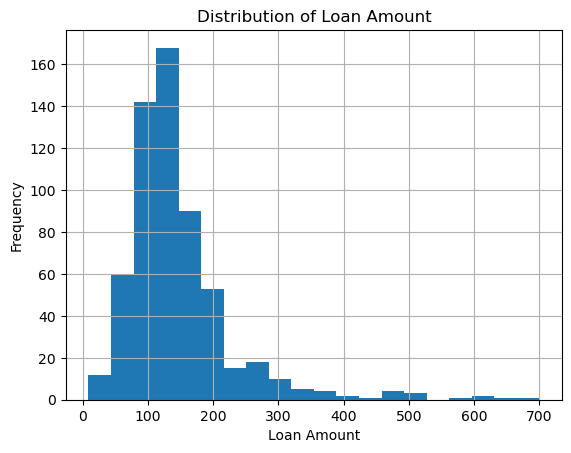

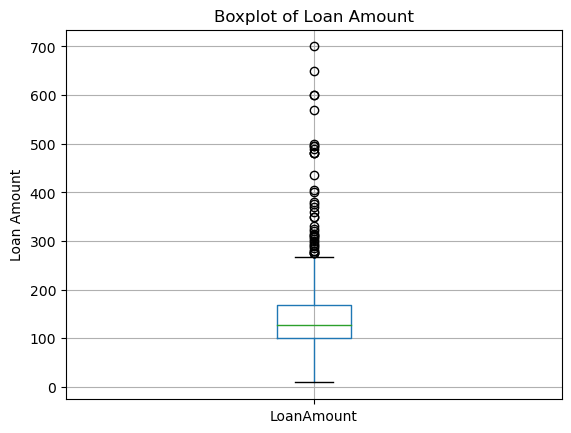

In [113]:


# Plot histogram of LoanAmount
df['LoanAmount'].hist(bins=20)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')
plt.show()

# Plot boxplot of LoanAmount
df.boxplot(column='LoanAmount')
plt.ylabel('Loan Amount')
plt.title('Boxplot of Loan Amount')
plt.show()


There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [123]:
df_2=df.copy()
df_2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# Create pivot table of Loan_Status by Credit_History and Gender
pivot_table = pd.pivot_table(data=df, index=['Credit_History', 'Gender'], columns='Loan_Status', aggfunc='size')


pivot_table = pd.pivot_table(data=df, index=['ApplicantIncome', 'Credit_History'], columns='Loan_Status', aggfunc='size')


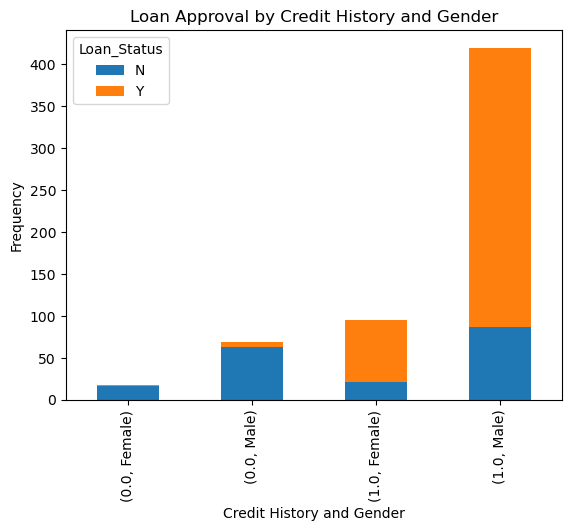

In [135]:
# Plot bar chart of pivot table
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Credit History and Gender')
plt.ylabel('Frequency')
plt.title('Loan Approval by Credit History and Gender')
plt.show()

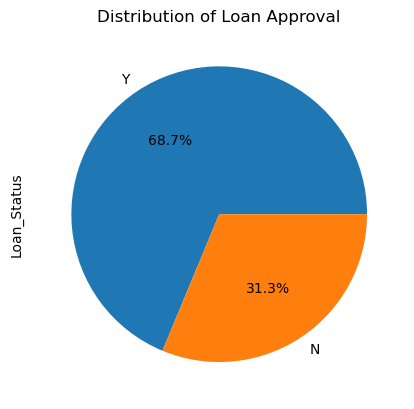

In [136]:
# Plot pie chart of Loan_Status
df['Loan_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Loan Approval')
plt.show()


In [119]:
df_1 =df.copy()
df_1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [120]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


#Gender              13
#df['Gender'].fillna(df['Gender'].median(), inplace=True)
#df.dropna(subset=['Gender'], inplace=True)

#Married              3

# df['Married'].fillna(df['Married'].median(), inplace=True)
#df.dropna(subset=['Married'], inplace=True)
#Dependents          15
#df['Dependents '].fillna(df['Dependents '].median(), inplace=True)
#df.dropna(subset=['Dependents'], inplace=True)
#Self_Employed       32
#df['Self_Employed '].fillna(df['Self_Employed '].median(), inplace=True)

#LoanAmount          22
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

#Loan_Amount_Term    14
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

#Credit_History      50
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)


df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [121]:
# One-hot encode categorical variables


# example of a one hot encoding
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
df_1 = pd.get_dummies(df, columns=['Gender', 'Married', 'Dependents', 'Education',
                               'Self_Employed', 'Property_Area'])
df_1

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,128.0,360.0,1.0,Y,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,N,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,Y,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,Y,0,1,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900,0.0,71.0,360.0,1.0,Y,1,0,1,...,0,0,0,1,0,1,0,1,0,0
610,LP002979,4106,0.0,40.0,180.0,1.0,Y,0,1,0,...,0,0,1,1,0,1,0,1,0,0
611,LP002983,8072,240.0,253.0,360.0,1.0,Y,0,1,0,...,1,0,0,1,0,1,0,0,0,1
612,LP002984,7583,0.0,187.0,360.0,1.0,Y,0,1,0,...,0,1,0,1,0,1,0,0,0,1


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

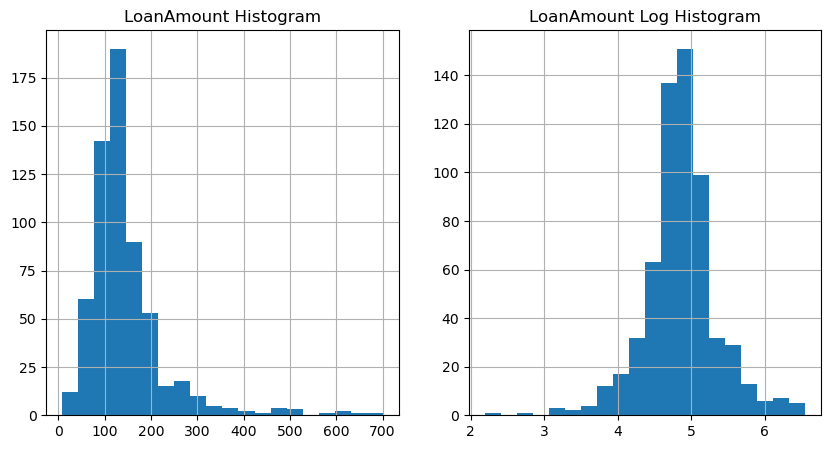

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Create a copy of the original dataset
data_copy = df.copy()

# Replace missing values in LoanAmount with the median
data_copy['LoanAmount'].fillna(data_copy['LoanAmount'].median(), inplace=True)

# Apply log transformation to LoanAmount
data_copy['LoanAmount_log'] = np.log(data_copy['LoanAmount'])

# Plot the histograms before and after the transformation
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
data_copy['LoanAmount'].hist(bins=20, ax=ax[0])
ax[0].set_title('LoanAmount Histogram')
data_copy['LoanAmount_log'].hist(bins=20, ax=ax[1])
ax[1].set_title('LoanAmount Log Histogram')
plt.show()


Combine both incomes as total income and take a log transformation of the same.

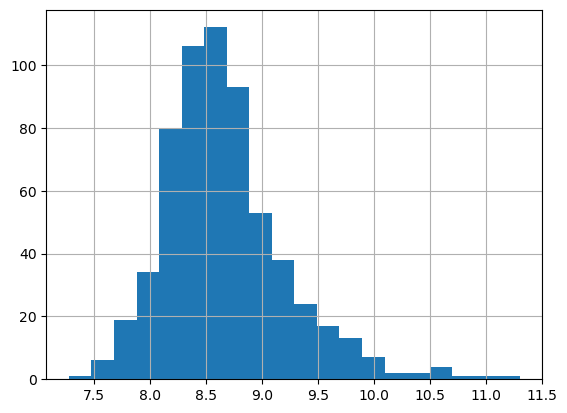

In [125]:
import numpy as np

# Create a copy of the original dataset
data_copy = df.copy()

# Replace missing values in ApplicantIncome and CoapplicantIncome with the median
data_copy['ApplicantIncome'].fillna(data_copy['ApplicantIncome'].median(), inplace=True)
data_copy['CoapplicantIncome'].fillna(data_copy['CoapplicantIncome'].median(), inplace=True)

# Combine incomes into TotalIncome and apply log transformation
data_copy['TotalIncome'] = np.log(data_copy['ApplicantIncome'] + data_copy['CoapplicantIncome'])

# Plot the histogram of TotalIncome
data_copy['TotalIncome'].hist(bins=20)
plt.show()


## 4. Building a Predictive Model

In [150]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data into a pandas dataframe
#data = pd.read_csv('loan_data.csv')

# Extract the relevant variables

variables =['Gender_Male','Gender_Female', 'Married_No', 'Education_Graduate', 'Education_Not Graduate', 'Dependents_2',
          'Dependents_3+','Self_Employed_No','Self_Employed_Yes','Property_Area_Rural','Property_Area_Semiurban',
          'Property_Area_Urban',
          'ApplicantIncome', 'LoanAmount', 'Credit_History']
X = df_1[variables].values

#y = df_1['Loan_Status']

#variables = ['Gender', 'Married', 'Education', 'Dependents', 'ApplicantIncome', 'LoanAmount', 'Credit_History']
#X = df_1[variables].values

# Standardize the variables
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Select the top 2 components
X_pca = pca.fit_transform(X_std)

# Print the results
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('PCA components:\n', pca.components_)
print('Transformed data:\n', X_pca)


Explained variance ratio: [0.15542859 0.14852806]
PCA components:
 [[-0.56947814  0.57532171  0.36199595  0.21855774 -0.21855774 -0.17294099
  -0.12626935 -0.02926694  0.01404889 -0.1518107   0.18373742 -0.04292233
  -0.05095446 -0.09735055  0.02225616]
 [ 0.09532775 -0.12577503 -0.12747252  0.51449336 -0.51449336  0.03244831
   0.069435   -0.24921747  0.24924132 -0.03495464  0.01553176  0.0177693
   0.36943655  0.39595909  0.06547301]]
Transformed data:
 [[ 0.18163014  0.23016565]
 [-0.81100774  0.30661833]
 [-0.36671826  1.40704967]
 ...
 [-0.74224588  1.22146939]
 [-1.12820435  0.96843305]
 [ 3.61379684  0.79650949]]


In [152]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load data into a pandas dataframe
#data = pd.read_csv('loan_data.csv')

# Extract the relevant variables
variables =['Gender_Male','Gender_Female', 'Married_No', 'Education_Graduate', 'Education_Not Graduate', 'Dependents_2',
          'Dependents_3+','Self_Employed_No','Self_Employed_Yes','Property_Area_Rural','Property_Area_Semiurban',
          'Property_Area_Urban',
          'ApplicantIncome', 'LoanAmount', 'Credit_History']
X = df_1[variables].values
y = df_1['Loan_Status'].values

# Standardize the variables
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Select the top 2 components
X_pca = pca.fit_transform(X_std)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Build a logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
print('Training accuracy:', clf.score(X_train, y_train))
print('Testing accuracy:', clf.score(X_test, y_test))


Training accuracy: 0.6965376782077393
Testing accuracy: 0.6504065040650406


In [167]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Load data into a pandas dataframe
#data = pd.read_csv('loan_data.csv')
#ApplicantIncome	CoapplicantIncome	LoanAmount	Loan_Amount_Term	Credit_History	Loan_Status	Gender_Female	
#Gender_Male	Married_No	...	Dependents_1	Dependents_2	Dependents_3+	Education_Graduate	Education_Not Graduate
#Self_Employed_No	Self_Employed_Yes	Property_Area_Rural	Property_Area_Semiurban	Property_Area_Urban
# Extract the relevant variables
variables =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History',
            'Gender_Male','Gender_Female', 'Married_No', 'Education_Graduate', 'Education_Not Graduate',
            'Dependents_1','Dependents_2',
          'Dependents_3+','Self_Employed_No','Self_Employed_Yes','Property_Area_Rural','Property_Area_Semiurban',
          'Property_Area_Urban',
          'ApplicantIncome', 'LoanAmount', 'Credit_History']
X = df_1[variables].values
y = df_1['Loan_Status'].values

# Standardize the variables and perform PCA
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])
X_pipe = pipe.fit_transform(X)

# Build a logistic regression model with grid search
param_grid = {'C': [30, 45, 20], 'penalty': ['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=48), param_grid, cv=10)
clf.fit(X_pipe, y)

# Print the best hyperparameters and scores
print('Best hyperparameters:', clf.best_params_)
print('Best score:', clf.best_score_)

# Perform feature selection
pca = PCA(n_components=2)
pca.fit(X)
features = pca.components_
print('PCA components:\n', features)
# get loadings
loadings = pd.DataFrame(pca.components_, columns=variables)

loadings

#loadings2 = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
#loadings2

Best hyperparameters: {'C': 30, 'penalty': 'l2'}
Best score: 0.6873083024854575
PCA components:
 [[ 7.06386170e-01 -4.44681945e-02  5.45990453e-03 -3.39352764e-04
  -7.63857684e-07  5.90680405e-07 -2.56818562e-06 -2.78098937e-06
   6.67216438e-06 -6.67216438e-06  1.77636013e-06 -1.49023155e-06
   4.97560399e-06 -5.43187969e-06  5.00744108e-06  8.27009064e-07
  -7.75729192e-07 -5.12798713e-08  7.06386170e-01  5.45990453e-03
  -7.63857684e-07]
 [ 3.13831263e-02  9.98954328e-01  7.69114504e-03 -1.46294471e-03
   1.06162076e-06  1.17588225e-05 -1.21486758e-05 -1.36729018e-05
   1.15824474e-05 -1.15824474e-05 -3.14793621e-06  7.04806133e-07
   5.94709040e-06 -6.04402089e-06  7.48652553e-08  1.17050949e-06
  -4.86817157e-06  3.69766208e-06  3.13831263e-02  7.69114504e-03
   1.06162076e-06]]


C:\Users\JaiminSanghani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JaiminSanghani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JaiminSanghani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\JaiminSanghani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _che

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_Female,Married_No,Education_Graduate,Education_Not Graduate,...,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,LoanAmount,Credit_History
0,0.706386,-0.044468,0.005460,-0.000339,-7.638577e-07,5.906804e-07,-0.000003,-0.000003,0.000007,-0.000007,...,-1.490232e-06,0.000005,-0.000005,5.007441e-06,8.270091e-07,-7.757292e-07,-5.127987e-08,0.706386,0.005460,-7.638577e-07
1,0.031383,0.998954,0.007691,-0.001463,1.061621e-06,1.175882e-05,-0.000012,-0.000014,0.000012,-0.000012,...,7.048061e-07,0.000006,-0.000006,7.486526e-08,1.170509e-06,-4.868172e-06,3.697662e-06,0.031383,0.007691,1.061621e-06


In [158]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the variables and perform PCA
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])
X_train_pipe = pipe.fit_transform(X_train)
X_test_pipe = pipe.transform(X_test)

# Train the logistic regression model with the best hyperparameters
clf = LogisticRegression(C=1, penalty='l2', random_state=42)
clf.fit(X_train_pipe, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_pipe)

# Evaluate the performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


Test accuracy: 0.6504065040650406


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [95]:

# Create a copy of the preprocessed dataset
data_copy = df1.copy()

# Drop the Loan_Id column
data_copy.drop('Loan_ID', axis=1, inplace=True)

# Select the features and target variable
X = data_copy.drop('Loan_Status', axis=1)
y = data_copy['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a logistic regression model and fit it to the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing data and calculate the accuracy score
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print('Accuracy:', accuracy)


Accuracy: 0.7837837837837838


C:\Users\JaiminSanghani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

# Create a copy of the preprocessed dataset
data_copy = df1.copy()

# Drop the Loan_Id column
data_copy.drop('Loan_ID', axis=1, inplace=True)

# Select the features and target variable
X = data_copy.drop('Loan_Status', axis=1)
y = data_copy['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a logistic regression model and fit it to the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing data and calculate the accuracy score
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print('Accuracy:', accuracy)

Try paramater grid search to improve the results

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a random forest classifier
rfc = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 150],
    'max_depth': [40, 60, 80],
    'min_samples_split': [18,50, 100],
    'min_samples_leaf': [20, 40,80]
}

# Create the grid search object
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'max_depth': 40, 'min_samples_leaf': 20, 'min_samples_split': 18, 'n_estimators': 150}
Best score:  0.7785499316005472


In [127]:
df_2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [176]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_2.drop(['Loan_Status', 'Loan_ID'], axis=1)

# Split the data into features and target variable
#X = df_2.drop('Loan_Status', axis=1)
y = df_2['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the categorical and numerical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Define the preprocessing steps for categorical and numerical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Define the model to be used
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)
#pipeline.fit(X_test, y_test)
# Predict the probability of being granted a loan for a single row of data
#x = X_test.iloc[0]
#print(pipeline.predict_proba(x.values.reshape(1, -1))[:, 1])
# Predict the probability of being granted a loan for a single row of data
x = X_test.iloc[0]
x_df = pd.DataFrame(x).T
print(pipeline.predict_proba(x_df)[:, 1])



[0.78]


In [171]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the dataset
#df = pd.read_csv('loan_data.csv')

# Preprocess the data
# ... (impute missing values, encode categorical variables, etc.)ApplicantIncome	CoapplicantIncome	LoanAmount	
#Loan_Amount_Term	Credit_History	Loan_Status	Gender_Female	Gender_Male	
#Married_No	...	Dependents_1	Dependents_2	Dependents_3+	Education_Graduate	Education_Not Graduate
#Self_Employed_No	Self_Employed_Yes	Property_Area_Rural	Property_Area_Semiurban	Property_Area_Urban

# Split the data into training and testing sets
X = df_1[['Gender_Male','Gender_Female', 'Married_No', 'Education_Graduate', 'Education_Not Graduate', 'Dependents_2',
          'Dependents_3+','Self_Employed_No','Self_Employed_Yes','Property_Area_Rural','Property_Area_Semiurban',
          'Property_Area_Urban',
          'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = df_1['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the testing set and evaluate the model performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


Accuracy: 64.23%


In [177]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the dataset
#df = pd.read_csv('loan_data.csv')

# Preprocess the data
# ... (impute missing values, encode categorical variables, etc.)

# Split the data into training and testing sets
X = df_1[['Gender_Male','Gender_Female', 'Married_No', 'Education_Graduate', 'Education_Not Graduate', 'Dependents_2',
          'Dependents_3+','Self_Employed_No','Self_Employed_Yes','Property_Area_Rural','Property_Area_Semiurban',
          'Property_Area_Urban',
          'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = df_1['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the testing set and evaluate the model performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


Accuracy: 77.24%


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [187]:
import pandas as pd
from sklearn.datasets import load_wine

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pickle

In [188]:
# own class that can be inserted to pipeline as any other sklearn object.
class RawFeats:
    def __init__(self, feats):
        self.feats = feats

    def fit(self, X, y=None):
        pass


    def transform(self, X, y=None):
        return X[self.feats]

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)


# features we want to keep for PCA
feats = ['Credit_History', 'TotalIncome_log', 'LoanAmount_log', 'Property_Area', 'Education']
# creating class object with indexes we want to keep.
raw_feats = RawFeats(feats)

In [189]:
sc = StandardScaler()
pca = PCA(n_components=2)

In [190]:
selection = SelectKBest(k=4)

In [191]:
rf = RandomForestClassifier()

In [192]:
PCA_pipeline = Pipeline([
    ("rawFeats", raw_feats),
    ("scaler", sc),
    ("pca", pca)
])

kbest_pipeline = Pipeline([("kBest", selection)])

In [193]:
all_features = FeatureUnion([
    ("pcaPipeline", PCA_pipeline), 
    ("kBestPipeline", kbest_pipeline)
])

In [194]:
main_pipeline = Pipeline([
    ("features", all_features),
    ("rf", rf)
])

In [195]:
# set up our parameters grid
param_grid = {"features__pcaPipeline__pca__n_components": [1, 2, 3],
                  "features__kBestPipeline__kBest__k": [1, 2, 3],
                  "rf__n_estimators":[2, 5, 10],
                  "rf__max_depth":[2, 4, 6]
             }

# create a Grid Search object
grid_search = GridSearchCV(main_pipeline, param_grid, n_jobs = -1, verbose=10, refit=True)    

# fit the model and tune parameters
df_copy = df.copy()
df_copy.drop('Loan_ID', axis=1, inplace=True)
le = LabelEncoder()
y= le.fit_transform(df_copy['Loan_Status'])
df_copy.drop('Loan_Status', axis=1, inplace=True)
grid_search.fit(df_copy, y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\JaiminSanghani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
405 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JaiminSanghani\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JaiminSanghani\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\JaiminSanghani\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one

KeyError: "['TotalIncome_log', 'LoanAmount_log'] not in index"

In [196]:
print(grid_search.best_params_)

{'features__kBestPipeline__kBest__k': 1, 'features__pcaPipeline__pca__n_components': 1, 'rf__max_depth': 2, 'rf__n_estimators': 2}


In [197]:

pickle.dump( grid_search, open( "model.p", "wb" ) )